#PokeScrapper

###Author: Syed (Sadat) Nazrul

Hello everyone! I hope you are all Pokemon fans. If not, I am sure you will still enjoy this tutorial (though I recommend you try Pokemon too....)

On this tutorial, we will cover the basics of web scraping, data frames, plotting. If you are patient, I will throw in a Pokedex GUI to the mix too!

Starting off, we will try scraping the online Pokemon Database (http://pokemondb.net/pokedex/all).

<img src="files/static/PokemonDatabase.png">

First off, we will import all the libraries needed to run our codes

In [1]:
import requests, six
import lxml.html as lh
from itertools import cycle, islice
from matplotlib import colors
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Next, we initialize the url we wish to scrape.

In [2]:
url='http://pokemondb.net/pokedex/all'

Before moving further, we need to check how the web page is structured. To do this, we inspect by righ-clicking on any element on the table and clicking 'Inspect element'.

Based on the HTML codes, the data are stored in after <tr...

<img src="files/static/inspectElement.png">

First, we will get the url using Python's requests library. 

After that, we store the contents of the page under doc.

Using doc, we can collect all data that are under <tr... as tr_elements.

Just to make sure we collected information only from the table, we will check the size of the first 12 rows.

In [3]:
page = requests.get(url)
doc = lh.fromstring(page.content)
tr_elements = doc.xpath('//tr')
[len(T) for T in tr_elements[:12]]

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10]

Good news. All the rows are of the same length of 10. 

This means all the data collected on tr_elements are from the table.

Next, let's parse the first row as our header.

In [4]:
tr_elements = doc.xpath('//tr')
col=[]
i=0
for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print '%d:"%s"'%(i,name)
    col.append((name,[]))

1:"#"
2:"Name"
3:"Type"
4:"Total"
5:"HP"
6:"Attack"
7:"Defense"
8:"Sp. Atk"
9:"Sp. Def"
10:"Speed"


Each header is appended to a tuple along with an empty list.

Let's populate these empty lists with the corresponding data!

In [5]:
for j in range(1,len(tr_elements)):
    T=tr_elements[j]
    if len(T)!=10:
        break
    i=0
    for t in T.iterchildren():
        data=t.text_content()
        if i>0:
            try:
                data=int(data)
            except:
                pass
        col[i][1].append(data)
        i+=1

Just to be sure, let's check the length of each column. Ideally, they should all be the same.

In [6]:
[len(C) for (title,C) in col]

[800, 800, 800, 800, 800, 800, 800, 800, 800, 800]

Perfect! Now we cna construct our Data Frame using Pandas.

In [7]:
Dict={title:column for (title,column) in col}
import pandas as pd
df=pd.DataFrame(Dict)

In [8]:
df.head()

,#,Attack,Defense,HP,Name,Sp. Atk,Sp. Def,Speed,Total,Type
0,001,49,49,45,Bulbasaur,65,65,45,318,GrassPoison
1,002,62,63,60,Ivysaur,80,80,60,405,GrassPoison
2,003,82,83,80,Venusaur,100,100,80,525,GrassPoison
3,003,100,123,80,VenusaurMega Venusaur,122,120,80,625,GrassPoison
4,004,52,43,39,Charmander,60,50,65,309,Fire


We have successfully created a Data Frame. The problem is that the Name and Type section are disorganized. We wish to reformat both.

In [9]:
def str_bracket(word):
    '''Add brackets around second term'''
    list = [x for x in word]
    for char_ind in range(1, len(list)):
        if list[char_ind].isupper():
            list[char_ind] = ' ' + list[char_ind]
    fin_list = ''.join(list).split(' ')
    length = len(fin_list)
    if length>1:
        fin_list.insert(1,'(')
        fin_list.append(')')
    return ' '.join(fin_list)

    
def str_break(word):
    '''Break strings at upper case'''
    list = [x for x in word]
    for char_ind in range(1, len(list)):
        if list[char_ind].isupper():
            list[char_ind] = ' ' + list[char_ind]
    fin_list = ''.join(list).split(' ')
    return fin_list

In [10]:
word = 'ILovePokemon'
print str_bracket(word)
print str_break(word)

I ( Love Pokemon )
['I', 'Love', 'Pokemon']


We have both our functions (prepared AND tested)! 

Now let's apply them to our Data Frame.

In [11]:
df['Name']=df['Name'].apply(str_bracket)
df['Type']=df['Type'].apply(str_break)

In [12]:
df.head()

,#,Attack,Defense,HP,Name,Sp. Atk,Sp. Def,Speed,Total,Type
0,001,49,49,45,Bulbasaur,65,65,45,318,"[Grass, Poison]"
1,002,62,63,60,Ivysaur,80,80,60,405,"[Grass, Poison]"
2,003,82,83,80,Venusaur,100,100,80,525,"[Grass, Poison]"
3,003,100,123,80,Venusaur ( Mega Venusaur ),122,120,80,625,"[Grass, Poison]"
4,004,52,43,39,Charmander,60,50,65,309,[Fire]


Much better. Now that we have a clean Data Frame, let's do some analysis. We wish to find the best (and worst) Pokemon for each stat.

In [13]:
def max_stats(df, col_list):
    message = ''
    for col in col_list:
        stat = df[col].max()
        name = df[df[col]==df[col].max()]['Name'].values[0]
        message += name+' has the greatest '+col+' of '+str(stat)+'.\n'
    return message

def min_stats(df, col_list):
    message = ''
    for col in col_list:
        stat = df[col].max()
        name = df[df[col]==df[col].min()]['Name'].values[0]
        message += name+' has the worst '+col+' of '+str(stat)+'.\n'
    return message

In [14]:
stats=['Attack', 'Defense','HP', 'Sp. Atk','Sp. Def','Speed','Total']

print max_stats(df, stats)

print min_stats(df, stats)

Mewtwo ( Mega  Mewtwo  X ) has the greatest Attack of 190.
Steelix ( Mega  Steelix ) has the greatest Defense of 230.
Blissey has the greatest HP of 255.
Mewtwo ( Mega  Mewtwo  Y ) has the greatest Sp. Atk of 194.
Shuckle has the greatest Sp. Def of 230.
Deoxys ( Speed  Forme ) has the greatest Speed of 180.
Mewtwo ( Mega  Mewtwo  X ) has the greatest Total of 780.

Chansey has the worst Attack of 190.
Chansey has the worst Defense of 230.
Shedinja has the worst HP of 255.
Shuckle has the worst Sp. Atk of 194.
Caterpie has the worst Sp. Def of 230.
Shuckle has the worst Speed of 180.
Sunkern has the worst Total of 780.



As usual, Mewtwo takes the lead for multiple categories!

Next up, let's see if there is a statistical correlation between any of these stats. 

To do this, we will use a scatter matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdafe5cc490>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdafcf23690>]], dtype=object)

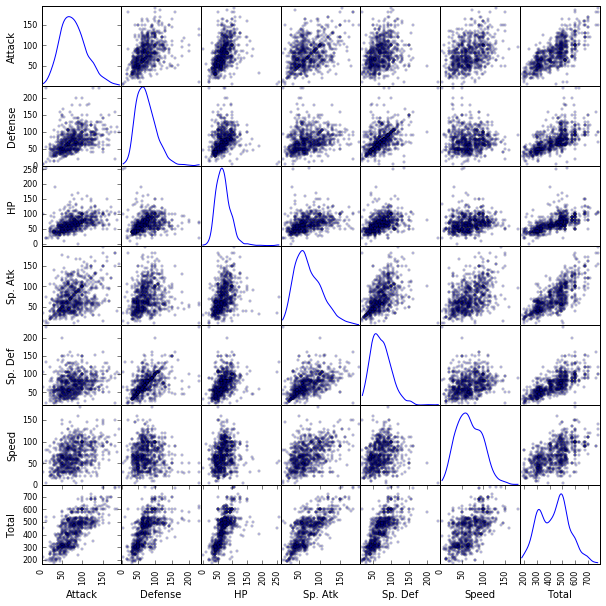

In [15]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(df[stats], alpha=0.2, figsize=(10, 10), diagonal='kde')

It's too much information at this point. Also, Total is positively correlated with everything and hence can be taken out of the matrix.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdaef22fd50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdaec833110>]], dtype=object)

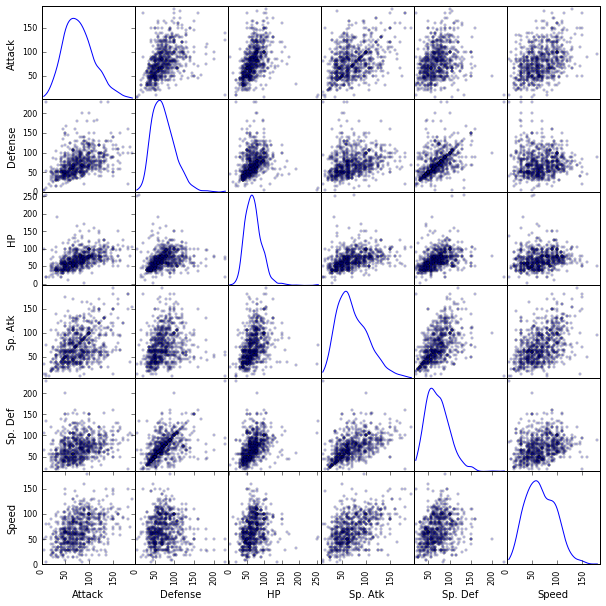

In [16]:
scatter_matrix(df[stats[:-1]], alpha=0.2, figsize=(10, 10), diagonal='kde')

There seem to be some positive correlation between Defense and Special Defense.

Other stats have some correlation too but the $R^2$ values are too low.

Now that we have seen the information on abilities, let's dig deeper!

For out next analysis, we will the effect of Pokemon type on abilities.

In [17]:
newDict={}
stats_col=["#","Name","Total","HP","Attack","Defense","Sp. Atk","Sp. Def","Speed"]
Dict['Type']=df['Type'].values

for col in stats_col:
    newDict[col]=[]
    newDict['Type']=[]

for row in range(len(Dict['#'])):
    for t in Dict['Type'][row]:
        for col in stats_col:
            newDict[col].append(Dict[col][row])
        newDict['Type'].append(t)
new_df = pd.DataFrame(newDict)

In [18]:
new_df.head()

,#,Attack,Defense,HP,Name,Sp. Atk,Sp. Def,Speed,Total,Type
0,001,49,49,45,Bulbasaur,65,65,45,318,Grass
1,001,49,49,45,Bulbasaur,65,65,45,318,Poison
2,002,62,63,60,Ivysaur,80,80,60,405,Grass
3,002,62,63,60,Ivysaur,80,80,60,405,Poison
4,003,82,83,80,Venusaur,100,100,80,525,Grass


Now that we have a new Data Frame restructured based on Type, let's see the unique Pokemon types.

In [19]:
types=new_df['Type'].unique()
print types

['Grass' 'Poison' 'Fire' 'Flying' 'Dragon' 'Water' 'Bug' 'Normal'
 'Electric' 'Ground' 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Steel' 'Ice'
 'Ghost' 'Dark']


In [36]:
my_colors = list(six.iteritems(colors.cnames))
my_colors = list(islice(cycle(my_colors), None, len(new_df)))

def barh_stats():
    i=0
    plt.figure(figsize=(15,5))
    for t in types:
        i+=1
        plt.suptitle('Statistics', fontsize=15)
        plt.subplot(121)
        plt.title('Mean')
        new_df[new_df['Type']==t].mean().plot(kind='barh', color=my_colors[i])
        plt.subplot(122)
        plt.title('Standard Deviation')
        new_df[new_df['Type']==t].std().plot(kind='barh', color=my_colors[i])
    plt.legend(types,bbox_to_anchor=(1.3, 1.1))

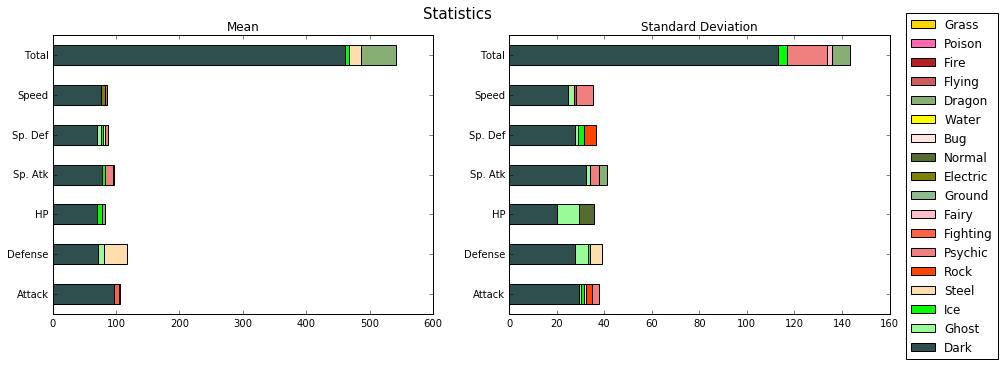

In [37]:
barh_stats()

Based on the graph, we can see that Dragon types are better on average based on Total stats while Steel types are exceptionally good at Defense.